In [4]:
import json
from collections import defaultdict
class_1_st1 = set()
class_1_st2 = set()
class_2_st1 = set()
class_2_st2 = set()
pth1 = "./annotatedv2_70b_prompt1_v5.json"
pth2 = "./annotatedv2_3b_prompt1_v5.json"

def get_tweets_by_class(inp_file, class_st1, class_st2):
    while True:
        ln = inp_file.readline()

        if not ln:
            break

        lnd = json.loads(ln)

        class_id = lnd["answer"]

        class_id = 1 if "1" in class_id else (2 if "2" in class_id else 3)

        if class_id == 1:
            class_st1.add(lnd["tweet_id"])
        elif class_id == 2:
            class_st2.add(lnd["tweet_id"])

with open(pth1, "r") as f:
    get_tweets_by_class(f, class_1_st1, class_2_st1)

with open(pth2, "r") as f:
    get_tweets_by_class(f, class_1_st2, class_2_st2)

In [10]:

def get_tweets_by_date(inp_file):
    date_class_dict = {
        1: defaultdict(int),
        2: defaultdict(int),
        3: defaultdict(int),
    }

    while True:
        ln = inp_file.readline()

        if not ln:
            break

        lnd = json.loads(ln)

        class_id = lnd["answer"]

        class_id = 1 if "1" in class_id else (2 if "2" in class_id else 3)

        date_class_dict[class_id][lnd["tweet_date"][:10]] += 1

    return date_class_dict

In [33]:
with open(pth1, "r") as f:
    by_date = get_tweets_by_date(f)

In [64]:
def plot_range_around_date(date, N_radius=10, include_class_3=False, stackplot=True):
    # stack plot the number of tweets in each class around a date
    # Use YYYY-MM-DD format for date
    # x-axis: date
    # class 1: red, class 2: green
    from datetime import datetime, timedelta

    date_obj = datetime.strptime(date, "%Y-%m-%d")

    date_range = [date_obj - timedelta(days=i) for i in range(N_radius, -N_radius-1, -1)]

    import matplotlib.pyplot as plt

    class_1 = [by_date[1][d.strftime("%Y-%m-%d")] for d in date_range]
    class_2 = [by_date[2][d.strftime("%Y-%m-%d")] for d in date_range]
    class_3 = [by_date[3][d.strftime("%Y-%m-%d")] for d in date_range]

    sums = [(sum(x) if sum(x)>0 else 1e-7) for x in (zip(class_1, class_2, class_3) if include_class_3 else zip(class_1, class_2))]

    class_1_normalized = [x / s for x, s in zip(class_1, sums)]
    class_2_normalized = [x / s for x, s in zip(class_2, sums)]
    class_3_normalized = [x / s for x, s in zip(class_3, sums)]

    if stackplot:
        if include_class_3:
            plt.stackplot(date_range, class_1_normalized, class_2_normalized, class_3_normalized, colors=['r', 'g', 'b'], labels=["Class 1", "Class 2", "Class 3"])
        else:
            plt.stackplot(date_range, class_1_normalized, class_2_normalized, colors=['r', 'g'], labels=["Class 1", "Class 2"])
        plt.ylabel("Proportion of tweets")
        plt.title("Proportion of tweets in each class around " + date)
    else:
        plt.plot(date_range, class_1, 'r', label="Class 1")
        plt.plot(date_range, class_2, 'g', label="Class 2")
        if include_class_3:
            plt.plot(date_range, class_3, 'b', label="Class 3")
        plt.ylabel("Number of tweets")
        plt.title("Number of tweets in each class around " + date)

    # plt.plot(date_range, class_1, 'r', label="Class 1")
    # plt.plot(date_range, class_2, 'g', label="Class 2")
    # plt.plot(date_range, class_3, 'b', label="Class 3")
    plt.xlabel("Date")

    plt.legend()
    plt.show()

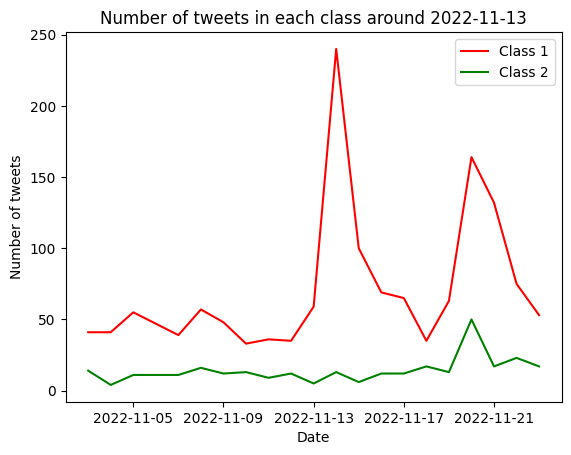

In [35]:
plot_range_around_date("2022-11-13", 10, False, False)

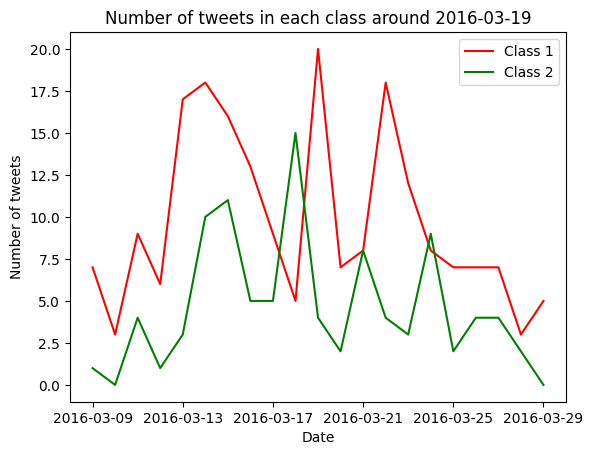

In [36]:
plot_range_around_date("2016-03-19", 10, False, False)

In [40]:
def plot_range(start_date, end_date, include_class_3=False, stackplot=True):
    # stack plot the number of tweets in each class around a date
    # Use YYYY-MM-DD format for date
    # x-axis: date
    # class 1: red, class 2: green
    from datetime import datetime, timedelta

    start_date_obj = datetime.strptime(start_date, "%Y-%m-%d")
    end_date_obj = datetime.strptime(end_date, "%Y-%m-%d")

    date_range = [start_date_obj + timedelta(days=i) for i in range((end_date_obj - start_date_obj).days + 1)]

    import matplotlib.pyplot as plt

    class_1 = [by_date[1][d.strftime("%Y-%m-%d")] for d in date_range]
    class_2 = [by_date[2][d.strftime("%Y-%m-%d")] for d in date_range]
    class_3 = [by_date[3][d.strftime("%Y-%m-%d")] for d in date_range]

    sums = [(sum(x) if sum(x)>0 else 1e-7) for x in (zip(class_1, class_2, class_3) if include_class_3 else zip(class_1, class_2))]

    class_1_normalized = [x / s for x, s in zip(class_1, sums)]
    class_2_normalized = [x / s for x, s in zip(class_2, sums)]
    class_3_normalized = [x / s for x, s in zip(class_3, sums)]

    if stackplot:
        if include_class_3:
            plt.stackplot(date_range, class_1_normalized, class_2_normalized, class_3_normalized, colors=['r', 'g', 'b'], labels=["Class 1", "Class 2", "Class 3"])
        else:
            plt.stackplot(date_range, class_1_normalized, class_2_normalized, colors=['r', 'g'], labels=["Class 1", "Class 2"])
        plt.ylabel("Proportion of tweets")
        plt.title("Proportion of tweets from " + start_date + " to " + end_date)
    else:
        plt.plot(date_range, class_1, 'r', label="Class 1")
        plt.plot(date_range, class_2, 'g', label="Class 2")
        if include_class_3:
            plt.plot(date_range, class_3, 'b', label="Class 3")
        plt.ylabel("Number of tweets")
        plt.title("Number of tweets from " + start_date + " to " + end_date)

    # plt.plot(date_range, class_1, 'r', label="Class 1")
    # plt.plot(date_range, class_2, 'g', label="Class 2")
    # plt.plot(date_range, class_3, 'b', label="Class 3")
    plt.xlabel("Date")

    plt.legend()
    plt.show()

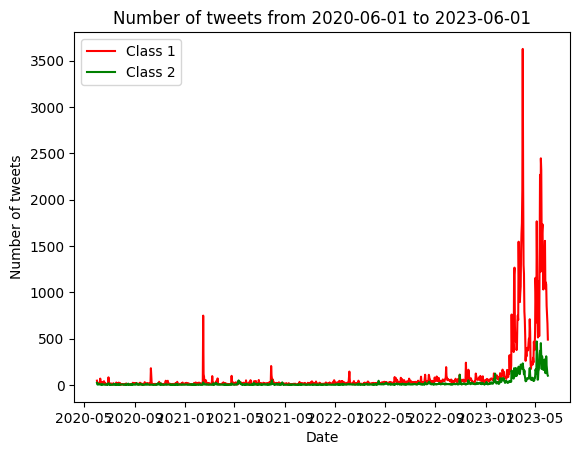

In [44]:
plot_range("2017-06-01", "2023-06-01", False, False)

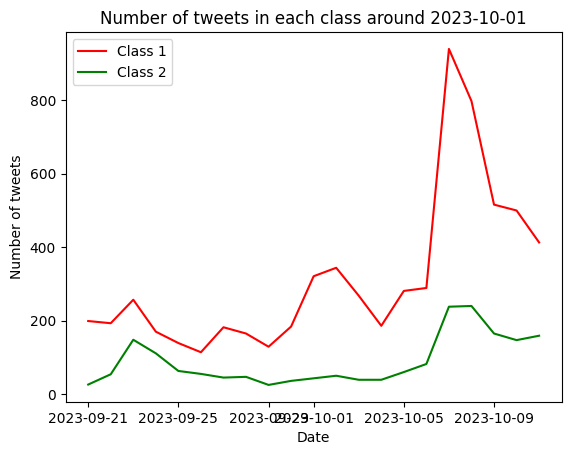

In [91]:
# plot_range("2016-01-01", "2016-12-31", False, False)
# plot_range("2015-01-01", "2015-12-31", False, False)
# plot_range("2015-01-01", "2015-12-31", False, False)
plot_range_around_date("2023-10-01", 10, False, False)

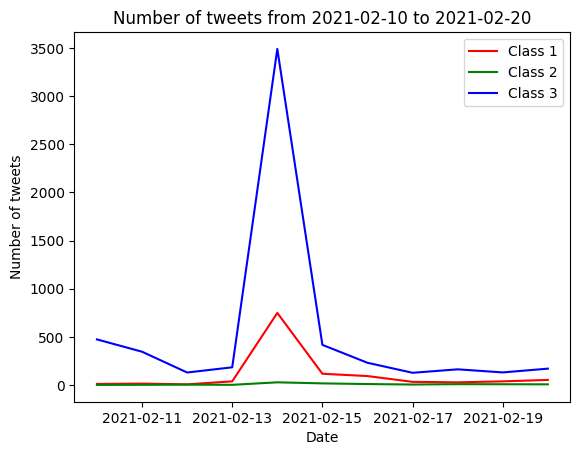

In [57]:
plot_range("2021-02-10", "2021-02-20", True, False)

In [84]:
start_date="2015-02-10"
end_date="2024-02-20"
include_class_3=False

from datetime import datetime, timedelta
start_date_obj = datetime.strptime(start_date, "%Y-%m-%d")
end_date_obj = datetime.strptime(end_date, "%Y-%m-%d")

date_range = [start_date_obj + timedelta(days=i) for i in range((end_date_obj - start_date_obj).days + 1)]

class_1 = [by_date[1][d.strftime("%Y-%m-%d")] for d in date_range]
class_2 = [by_date[2][d.strftime("%Y-%m-%d")] for d in date_range]
class_3 = [by_date[3][d.strftime("%Y-%m-%d")] for d in date_range]

sums = [(sum(x) if sum(x)>0 else 1e-7) for x in (zip(class_1, class_2, class_3) if include_class_3 else zip(class_1, class_2))]

class_1_normalized = [x / s for x, s in zip(class_1, sums)]
class_2_normalized = [x / s for x, s in zip(class_2, sums)]
class_3_normalized = [x / s for x, s in zip(class_3, sums)]

# Zero out c2 score if number of tweets of c1 + c2 less than 10
c2_filtered = [c2n if c1+c2 >= 25 else 0 for c2n, c1, c2 in zip(class_2_normalized, class_1, class_2)]

# Find the index where class_2_normalized is maximum
max_idx = c2_filtered.index(max(c2_filtered))

print("Date with maximum proportion of class 2 tweets: ", date_range[max_idx].strftime("%Y-%m-%d"), " with proportion: ", class_2_normalized[max_idx])

Date with maximum proportion of class 2 tweets:  2016-11-13  with proportion:  0.8108108108108109


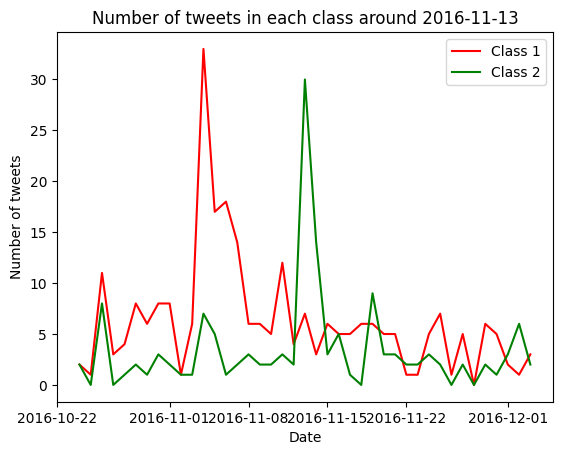

In [85]:
plot_range_around_date(date_range[max_idx].strftime("%Y-%m-%d"), 20, False, False)

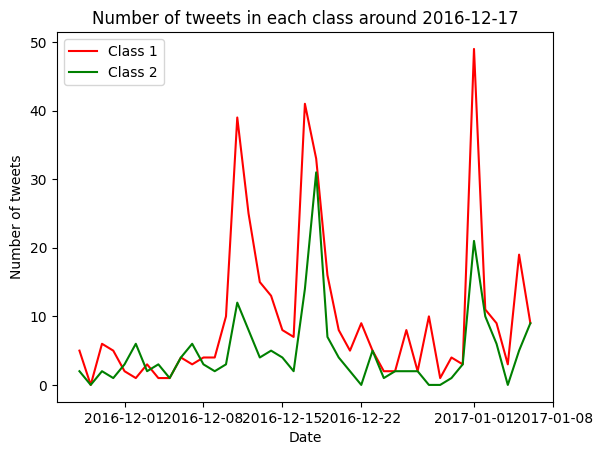

In [87]:
plot_range_around_date("2016-12-17", 20, False, False)

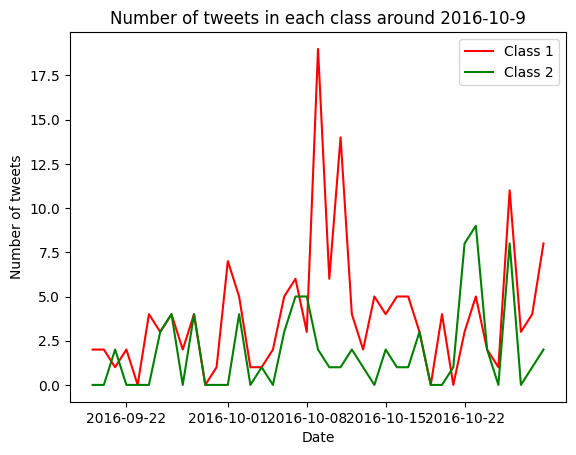

In [88]:
plot_range_around_date("2016-10-9", 20, False, False)

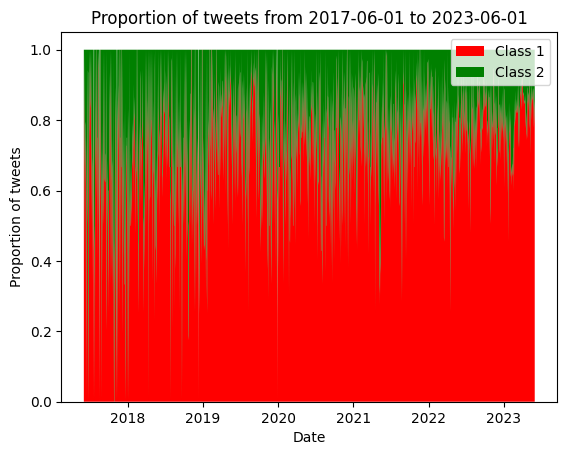

In [93]:
plot_range("2017-06-01", "2023-06-01", False, True)

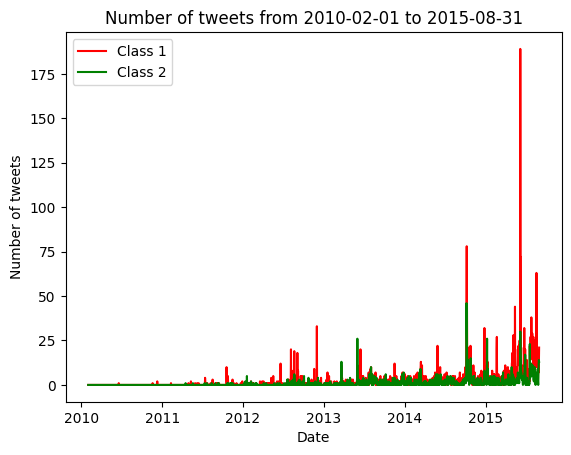

In [96]:
plot_range("2010-02-01", "2015-08-31", False, False)

In [8]:
# Print size of union as well as intersection of the two classes
print("Class 1")
print("Union: ", len(class_1_st1.union(class_1_st2)))
print("Intersection: ", len(class_1_st1.intersection(class_1_st2)))

print("Class 2")
print("Union: ", len(class_2_st1.union(class_2_st2)))
print("Intersection: ", len(class_2_st1.intersection(class_2_st2)))

# Print the size of the intersection of the two classes
print("Class 1 annotations 1 and Class 2 annotations 2")
print("Intersection: ", len(class_1_st1.intersection(class_2_st2)))
print("Intersection: ", len(class_2_st1.intersection(class_1_st2)))



Class 1
Union:  610115
Intersection:  189436
Class 2
Union:  103742
Intersection:  18210
Class 1 annotations 1 and Class 2 annotations 2
Intersection:  4365
Intersection:  21834
